In [23]:
# Wrangling/math/stats
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Evaluation / Stats
from sklearn.metrics import r2_score
from lifelines.utils.concordance import concordance_index
from scipy.stats import kendalltau

# System utils
import os
from pathlib import Path
import pickle as pkl
import warnings
from typing import Tuple
from pandas.api.types import is_numeric_dtype

# Get local file structure
CWD = os.getcwd()
CWD = Path(CWD)
DATA = CWD / "data"
MODEL_DATA = DATA / "data_for_modeling"
OPTIMIZATION = CWD/"optimization"

In [24]:
def generate_mosaic_plot(data: pd.DataFrame, x: str, y: str, val: str, scale: Tuple[float, float]  = (1,1)):
    """
    Generates a mosaic plot from two ordinal variables using statsmodels.graphics.mosaicplot.

    Args:
        data (pandas.DataFrame): The input data containing the variables.
        x (str): The name of the variable for the x-axis.
        y (str): The name of the variable for the y-axis.
    """
    _data = data[~data[x].isna() & ~data[y].isna()]
    # Prepare the data for the mosaic plot
    cross_table = pd.crosstab(_data[x], _data[y])
    plot_data = cross_table.stack()

    # Calculate stats as needed
    if  is_numeric_dtype(data[x]):
        dtype_x = True
    else:
        try:
            dtype_x = data[x].cat.ordered
        except:
            dtype_x = False

    if  is_numeric_dtype(data[y]):
        dtype_y = True
    else:
        try:
            dtype_y = data[y].cat.ordered
        except:
            dtype_y = False

    if dtype_x and dtype_y:
        # Ignore warnings for now / this is more for exploration, some overflows are fine
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        tau = kendalltau(_data[x].rank(method='dense'), _data[y].rank(method='dense'))[0]
        warnings.filterwarnings("default", category=RuntimeWarning)
    else:
        tau = False

    # Create the mosaic plot
    nx = scale[0]
    ny = scale[1]
    N_x = len(_data[x].unique())
    N_y = len(_data[y].unique())
    _, ax = plt.subplots(figsize=(N_x/3*nx, N_y/3*ny))
    stat = "" if not tau else f" (τ = {tau:.2})"
    mosaic(plot_data, ax=ax, title=f"True vs Predicted{val}{stat}", labelizer=lambda _: "", label_rotation=(-90,0), statistic=True, gap=.075)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # Plot and close
    plt.show()
    plt.close()
    

# Purchase

In [25]:
test_purch_X = pd.read_pickle(MODEL_DATA/"purchase_test_X.pkl")
test_purch_y = pd.read_pickle(MODEL_DATA/"purchase_test_y.pkl")

In [26]:
with open (OPTIMIZATION/"purchase_best_DT.pkl", "rb") as dtp:
    purch_dt_model = pkl.load(dtp)

dt_purch_pred = np.round(purch_dt_model.predict(test_purch_X))
dt_purch_r2 = r2_score(test_purch_y, dt_purch_pred)
dt_purch_ci = concordance_index(test_purch_y, dt_purch_pred)
dt_purch_kt = kendalltau(test_purch_y, dt_purch_pred).statistic
print(f"Purchase {dt_purch_r2*100:.0f} R^2; {dt_purch_ci*100:.0f} CI; Kendall's Tau: {dt_purch_kt*100:.0f}")

Purchase 86 R^2; 92 CI; Kendall's Tau: 84


In [27]:
with open (OPTIMIZATION/"purchase_best_RF.pkl", "rb") as rfp:
    purch_rf_model = pkl.load(rfp)

rf_purch_pred = np.round(purch_rf_model.predict(test_purch_X))
rf_purch_r2 = r2_score(test_purch_y, rf_purch_pred)
rf_purch_ci = concordance_index(test_purch_y, rf_purch_pred)
rf_purch_kt = kendalltau(test_purch_y, rf_purch_pred).statistic
print(f"Purchase {rf_purch_r2*100:.0f} R^2; {rf_purch_ci*100:.0f} CI; Kendall's Tau: {rf_purch_kt*100:.0f}")

Purchase 88 R^2; 93 CI; Kendall's Tau: 86


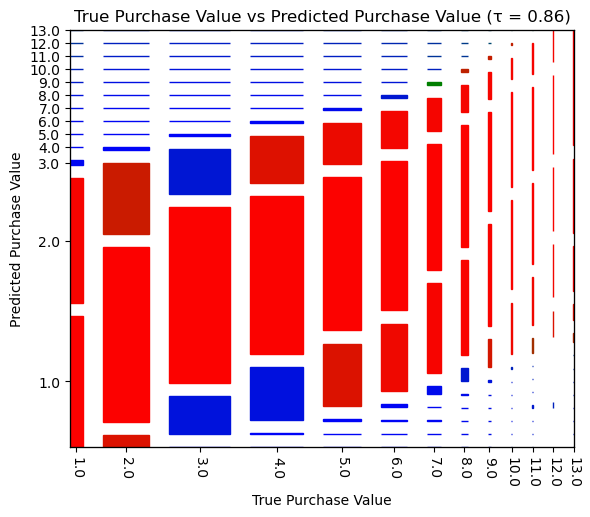

In [28]:
purch_res = pd.DataFrame({"True Purchase Value":test_purch_y, "Predicted Purchase Value":rf_purch_pred})
generate_mosaic_plot(purch_res, "True Purchase Value", "Predicted Purchase Value", scale = (1.5, 1.25))

# Appraisal

In [29]:
test_appr_X = pd.read_pickle(MODEL_DATA/"appraisal_test_X.pkl")
test_appr_y = pd.read_pickle(MODEL_DATA/"appraisal_test_y.pkl")

In [30]:
with open (OPTIMIZATION/"appraisal_best_DT.pkl", "rb") as dtp:
    appr_dt_model = pkl.load(dtp)

dt_appr_pred = np.round(appr_dt_model.predict(test_appr_X))
dt_appr_r2 = r2_score(test_appr_y, dt_appr_pred)
dt_appr_ci = concordance_index(test_appr_y, dt_appr_pred)
dt_appr_kt = kendalltau(test_appr_y, dt_appr_pred).statistic
print(f"Purchase {dt_appr_r2*100:.0f} R^2; {dt_appr_ci*100:.0f} CI; Kendall's Tau: {dt_appr_kt*100:.0f}")

Purchase 91 R^2; 95 CI; Kendall's Tau: 89


In [31]:
with open (OPTIMIZATION/"appraisal_best_RF.pkl", "rb") as rfp:
    appr_rf_model = pkl.load(rfp)

rf_appr_pred = np.round(appr_rf_model.predict(test_appr_X))
rf_appr_r2 = r2_score(test_appr_y, rf_appr_pred)
rf_appr_ci = concordance_index(test_appr_y, rf_appr_pred)
rf_appr_kt = kendalltau(test_appr_y, rf_appr_pred).statistic
print(f"Purchase {rf_appr_r2*100:.0f} R^2; {rf_appr_ci*100:.0f} CI; Kendall's Tau: {rf_appr_kt*100:.0f}")

Purchase 93 R^2; 95 CI; Kendall's Tau: 91


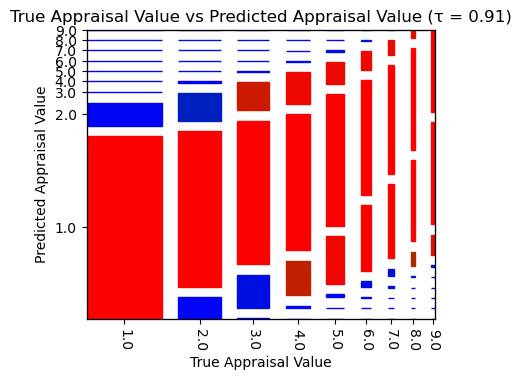

In [32]:
appr_res = pd.DataFrame({"True Appraisal Value":test_appr_y, "Predicted Appraisal Value":rf_appr_pred})
generate_mosaic_plot(appr_res, "True Appraisal Value", "Predicted Appraisal Value", scale = (1.5, 1.25))

In [33]:
true_y = np.concatenate([test_purch_y, test_appr_y])
rf_pred_y = np.concatenate([rf_purch_pred, rf_appr_pred])
rf_r2 = r2_score(true_y, rf_pred_y)
rf_ci = concordance_index(true_y, rf_pred_y)
rf_kt = kendalltau(true_y, rf_pred_y).statistic
print(f"Purchase {rf_r2*100:.0f} R^2; {rf_ci*100:.0f} CI; Kendall's Tau: {rf_kt*100:.0f}")

Purchase 91 R^2; 95 CI; Kendall's Tau: 89
